# 📊  Análise Exploratória (EDA)

In [21]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Abrir o ficheiro com ; como separador
df = pd.read_csv('datasets/consumo_eredes_limpo.csv', sep=',')

In [23]:
# mostrar: count, mean, std (desvio padrão), min, 25%, 50%, 75%, max
df['Active Energy (kWh)'].describe()

count    3.727424e+06
mean     1.006610e+04
std      1.154807e+04
min      1.167000e+00
25%      2.660105e+03
50%      6.758455e+03
75%      1.354280e+04
max      1.508790e+05
Name: Active Energy (kWh), dtype: float64

| Estatística    | Significado             |
|----------------|-------------------------|
| count = 3.727.424 | Total de registos (sem valores negativos) |
| mean = 10.066,10 kWh | Valor médio de consumo por registo |
| std = 11.548,07 kWh | Desvio padrão (os valores ainda variam bastante) |
| min = 1,17 kWh | Mínimo consumo positivo registado |
| 25% = 2.660,11 kWh | 25% dos valores estão abaixo deste valor |
| 50% = 6.758,46 kWh | Mediana (valor do meio) |
| 75% = 13.542,80 kWh | 75% dos valores estão abaixo deste valor |
| max = 150.879,00 kWh | Maior valor registado (alto, mas plausível) |

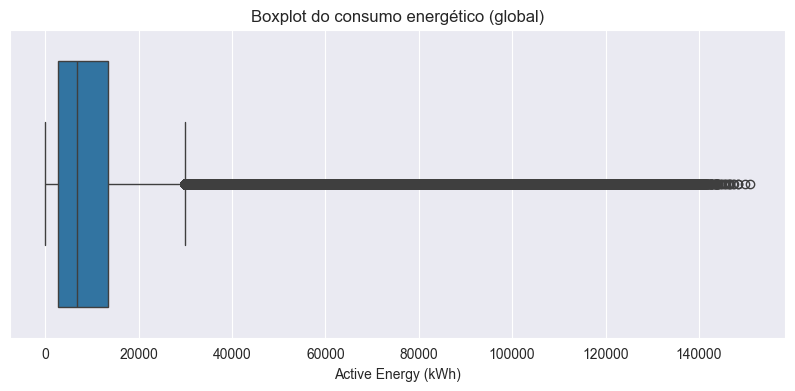

In [24]:
# Boxplot global
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Active Energy (kWh)'])
plt.title("Boxplot do consumo energético (global)")
plt.savefig('figuras/boxplot-consumo-energetico-global.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação:
- O gráfico mostra que a maioria dos valores está concentrada em consumos mais baixos (até ~13.500 kWh).

- Os consumos acima dos 35.000–40.000 kWh são considerados outliers estatísticos, mesmo que possam ser reais.

- A densidade de outliers é alta, o que indica variabilidade nos dados — pode ser devido a zonas industriais, grandes edifícios ou regiões com maior produção.

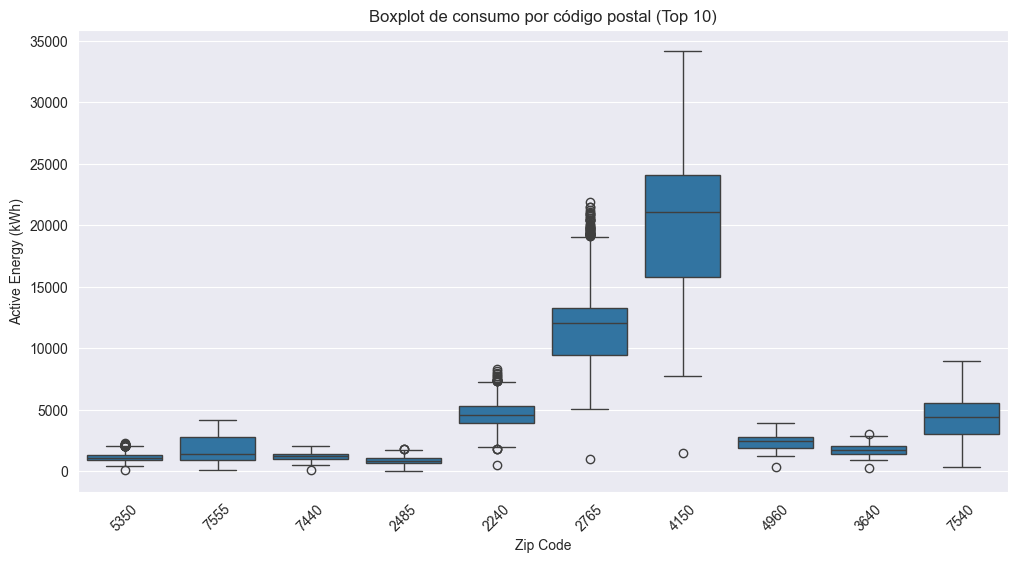

In [25]:
# Boxplots por código postal (comparativo)
# Se tiveres muitos códigos postais, escolhe os top 10 com mais dados:
top_zips = df['Zip Code'].value_counts().head(10).index
df_top = df[df['Zip Code'].isin(top_zips)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Zip Code', y='Active Energy (kWh)', data=df_top)
plt.title("Boxplot de consumo por código postal (Top 10)")
plt.xticks(rotation=45)
plt.savefig('figuras/boxplot-consumo-por-top10codigopostal.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação:
- A análise por código postal mostra variações significativas na distribuição de consumo energético. Códigos como 2135 e 2520 apresentam médias e máximos mais elevados, o que sugere zonas com maior atividade energética.

- Em contrapartida, códigos como 2485 e 7330 apresentam padrões de consumo mais baixos e consistentes. Outliers estão presentes em quase todas as regiões, indicando a existência de picos ocasionais que podem afetar previsões locais.

In [26]:
# Converter a coluna para datetime
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Garantir que Datetime é o índice
df.set_index('Datetime', inplace=True)

# 📊Gráfico de consumo total agregado ao longo do tempo

In [27]:
# Agrupar por ano e mês
df_mensal = df.groupby(['Year', 'Month'])['Active Energy (kWh)'].sum().reset_index()

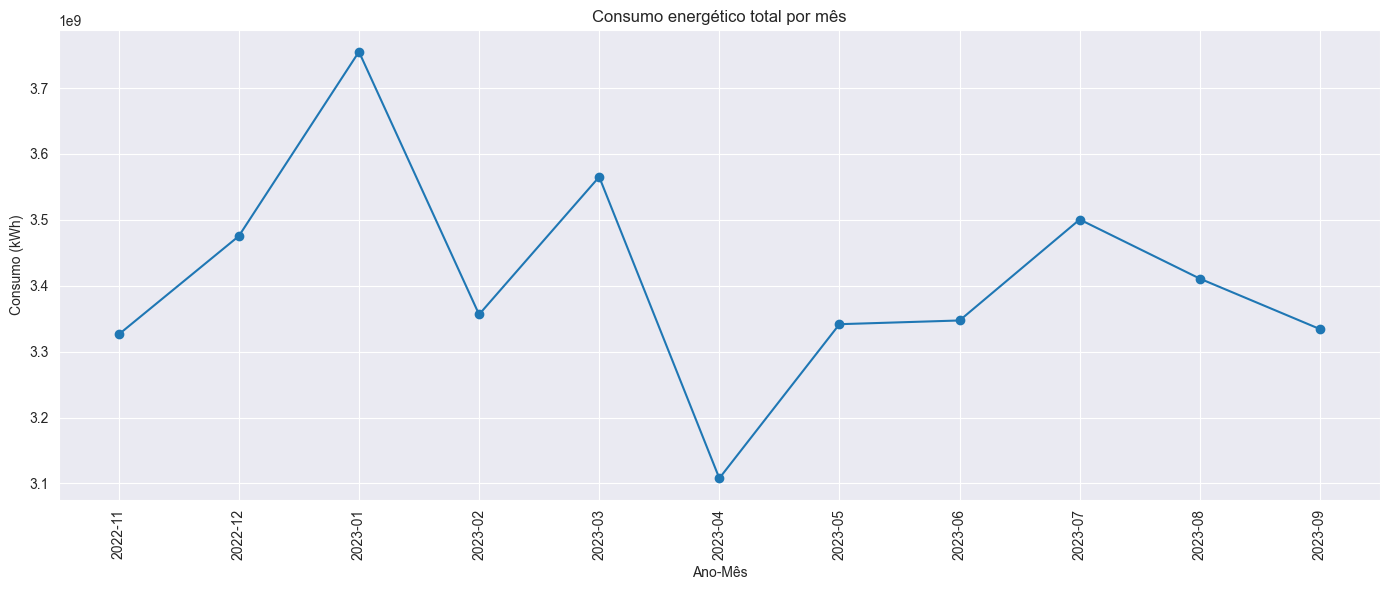

In [28]:
# Cria uma coluna com o label formatado (ex: 2023-07)
df_mensal['Label'] = df_mensal['Year'].astype(str) + '-' + df_mensal['Month'].astype(str).str.zfill(2)

plt.figure(figsize=(14, 6))
plt.plot(df_mensal['Label'], df_mensal['Active Energy (kWh)'], marker='o')
plt.title('Consumo energético total por mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Consumo (kWh)')
plt.grid(True)
plt.xticks(rotation=90)  # rotação para caber tudo
plt.tight_layout()
plt.savefig('figuras/consumo-energetico-por-mes.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação
- Existe um padrão sazonal claro: o consumo sobe no inverno e desce na primavera.
- Janeiro de 2023 marca o pico de consumo, o que faz sentido (frio, menos luz natural, mais tempo em casa).
- Abril de 2023 é o ponto mais baixo — pode coincidir com clima mais ameno, menos aquecimento, ou feriados prolongados.
- Os valores de verão (junho–agosto) são mais estáveis, mas ainda relativamente elevados — talvez devido a uso de ar condicionado ou turismo.



# 📊Gráfico do top 10 códigos postais com maior consumo total de energia


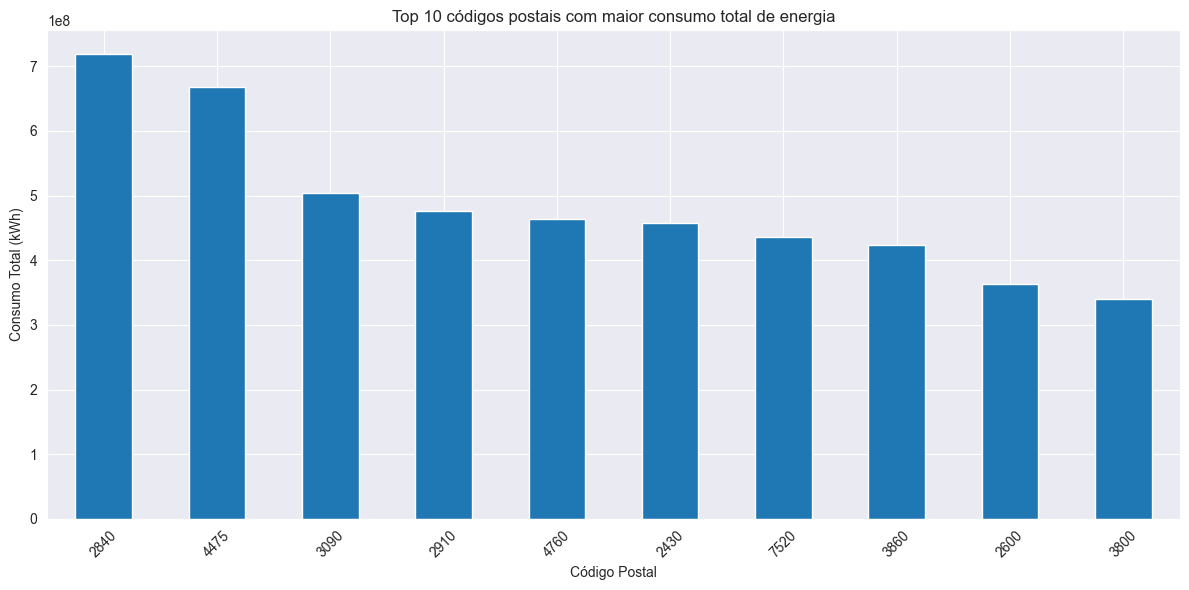

In [29]:
consumo_total_por_zip = df.groupby('Zip Code')['Active Energy (kWh)'].sum().sort_values(ascending=False)

consumo_total_por_zip.head(10).plot(kind='bar', figsize=(12,6))
plt.title('Top 10 códigos postais com maior consumo total de energia')
plt.xlabel('Código Postal')
plt.ylabel('Consumo Total (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figuras/top10codigopostal-com-maior-consumo-energia.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação
Os maiores consumidores são, sem surpresa, zonas industriais ou urbanas muito densas.

| Codigo Postal | Observação                                                              |
|---------------|-------------------------------------------------------------------------|
| Sines (7520)  | especialmente relevante, por ser uma zona energética estratégica do país |
| Palmela (2910) | destaca-se por abrigar a Autoeuropa — uma das maiores fábricas de Portugal |
| Vila Nova de Famalicão, Marinha Grande, Estarreja e Vila Franca de Xira | conhecidas pela atividade industrial |
| Seixal (2840) | está em 1.º lugar — zona com alta densidade populacional e consumo residencial elevado, além de alguns polos industriais |

# 📊 Grafico de consumo medio por hora do dia

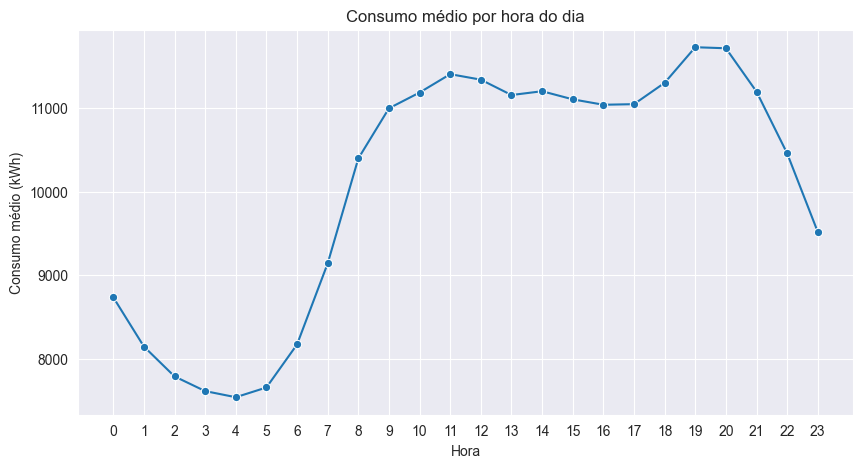

In [30]:
media_por_hora = df.groupby('Hour')['Active Energy (kWh)'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=media_por_hora.index, y=media_por_hora.values, marker='o')
plt.title('Consumo médio por hora do dia')
plt.xlabel('Hora')
plt.ylabel('Consumo médio (kWh)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.savefig('figuras/consumo-medio-por-hora-do-dia.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação

| Hora  | Observação                                                                                               |
|-------|----------------------------------------------------------------------------------------------------------|
| 00h–05h | Consumo mais baixo do dia – normal durante o período de sono, onde a maioria das atividades está desligada |
| 06h–08h | Aumento progressivo – início da atividade humana: acordar, luzes, duches, cozinhar, transportes, etc |
| 09h–17h | Manutenção de consumo elevado – período de atividade comercial e industrial |
| 11h–12h | Pico visível – possível sobreposição de consumo doméstico (almoço) + comercial |
| 18h–20h | Maior pico do dia – regresso a casa, cozinhar, iluminação, TV, eletrodomésticos |
| 21h–23h | Queda gradual no final do dia – fim das atividades, início de descanso |

# 📊 Grafico de consumo medio por dia da semana

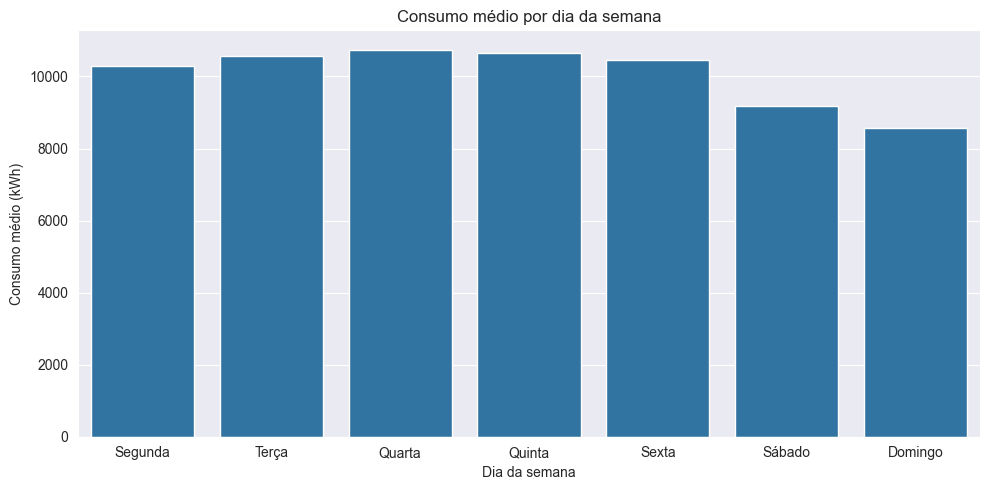

In [31]:
media_por_dia_semana = df.groupby('Day of the Week')['Active Energy (kWh)'].mean()

# Ordenar os dias (opcional, se não estiverem na ordem certa)
ordem_dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
media_por_dia_semana = media_por_dia_semana.reindex(ordem_dias)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=media_por_dia_semana.index, y=media_por_dia_semana.values)
plt.title('Consumo médio por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Consumo médio (kWh)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('figuras/consumo-medio-por-dia-da-semana.png', dpi=300, bbox_inches='tight')
plt.show()


# 📈 Interpretação

| Dia da semana | Observação |
|--------------|----------|
| 2f a 6f | Consumo elevado e estável – representa os dias úteis, com forte atividade residencial + industrial/comercial |
| 4f a 5f | Picos ligeiramente acima da média – possivelmente os dias mais "ativos" da semana |
| Sábado | Queda notável no consumo – menor atividade laboral e comercial |
| Domingo | Consumo ainda mais baixo – representa o mínimo da semana, comum ao ser um dia de descanso |

# 📊 Grafico de consumo medio por mês

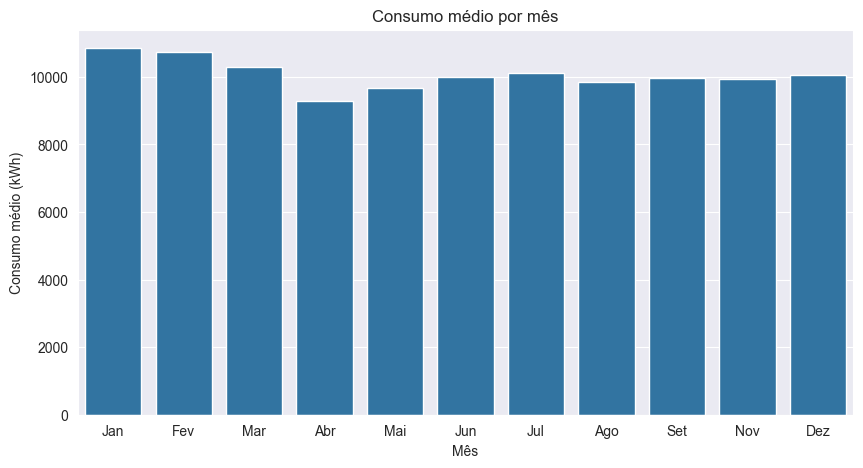

In [32]:
media_por_mes = df.groupby('Month')['Active Energy (kWh)'].mean()

# Opcional: nomes dos meses
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure(figsize=(10,5))
sns.barplot(x=[meses[i-1] for i in media_por_mes.index], y=media_por_mes.values)
plt.title('Consumo médio por mês')
plt.xlabel('Mês')
plt.ylabel('Consumo médio (kWh)')
plt.grid(True, axis='y')
plt.savefig('figuras/consumo-medio-por-mes.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação
| Mês | Observação |
|--------|-------|
| Jan e Fev | Meses com maior consumo médio – típico dos meses de inverno (aquecimento, luzes ligadas por mais tempo, etc.) |
| Mar | Ligeira redução, com transição para a primavera |
| Abr e Mai | Queda mais acentuada – clima mais ameno, menos necessidade de aquecimento |
| Jun a Set | Consumo médio relativamente estável – verão em Portugal, mas sem aumento brusco |
| Out a Dez | Leve tendência de aumento – aproximação ao inverno novamente |

# 📊 Qual é o consumo médio por hora em cada dia da semana?

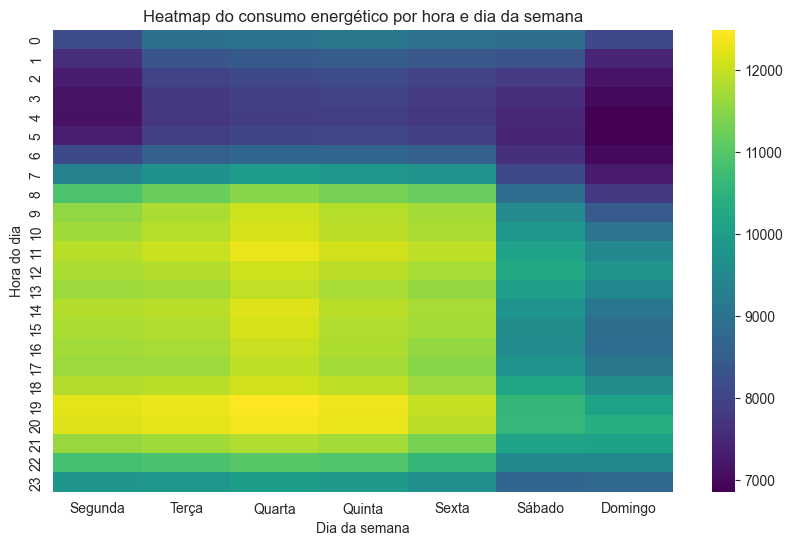

In [33]:
# Ordenar os dias para visualização correta
ordem_dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

# Criar tabela com média de consumo por dia/hora
tabela = df.pivot_table(index='Hour', columns='Day of the Week', values='Active Energy (kWh)', aggfunc='mean')
tabela = tabela[ordem_dias]

plt.figure(figsize=(10, 6))
sns.heatmap(tabela, cmap='viridis')
plt.title('Heatmap do consumo energético por hora e dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Hora do dia')
plt.savefig('figuras/heatmap-consumo-energetico-por-hora-e-dia-da-semana.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação
00h–06h (madrugada):
- Baixo consumo em todos os dias, especialmente mais escuro (baixo) ao fim de semana.
- Menor atividade → pessoas a dormir, empresas fechadas.

08h–18h (horário comercial):
- Consumo elevado de segunda a sexta, com tons entre o verde e amarelo (1100–1250 kWh).
- Claramente o período de maior atividade energética (indústrias, escolas, serviços).

Pico de consumo entre 18h e 20h (dias úteis):
- Atinge valores máximos à quarta e quinta-feira às 19h, visível pelas áreas mais claras.
- Coincide com o regresso a casa, jantar, eletrodomésticos, iluminação — e ainda com atividade comercial em alguns locais.

Sábados e Domingos:
- Queda acentuada em todo o dia:
    - Tons mais frios (azul/roxo claro), indicando menor consumo.
    - Ainda assim, há algum pico entre 10h–12h e 18h, mas inferior aos dias úteis.

# 📊 Há meses e horas com padrões muito diferentes?

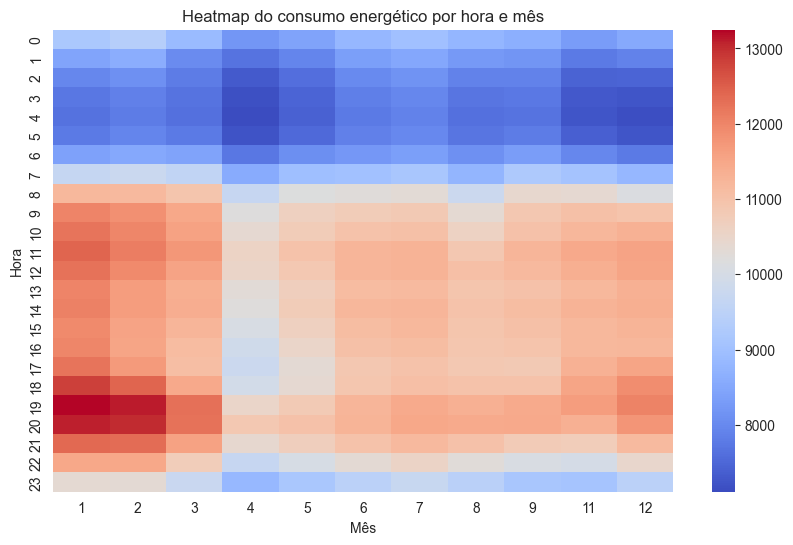

In [34]:
tabela = df.pivot_table(index='Hour', columns='Month', values='Active Energy (kWh)', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(tabela, cmap='coolwarm')
plt.title('Heatmap do consumo energético por hora e mês')
plt.xlabel('Mês')
plt.ylabel('Hora')
plt.savefig('figuras/heatmap-consumo-energetico-por-hora-e-mes.png', dpi=300, bbox_inches='tight')
plt.show()

# 📈 Interpretação
| Hora | Padrão geral | Meses com maior consumo | Observações |
|---|---|---|---|
| 00h–06h | Consumo muito baixo | Nenhum específico | Período de sono → uso mínimo de energia (luzes apagadas, poucas atividades) |
| 07h–08h | Início do aumento | Constante em todos os meses | Início da rotina diária (banhos, eletrodomésticos, deslocações, indústrias a arrancar) |
| 09h–17h | Consumo elevado estável | Todos os meses | Período ativo → empresas, escolas, comércio, escritórios, fábricas |
| 18h–20h | Pico absoluto de consumo | Janeiro, Fevereiro | Final do dia: regresso a casa + frio do inverno + iluminação e aquecimento intensos |
| 21h–23h | Queda progressiva | Mais acentuada nos meses quentes | Fim das atividades → menos consumo (alguns picos residuais de TV e jantar) |